In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble  import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df = pd.read_csv(r'I:\Deep Learning data\water_potability\water_potability.csv')

In [25]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [27]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [28]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [29]:
df = df.dropna()

In [30]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [31]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [32]:
df.shape

(2011, 10)

In [33]:
df.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

In [35]:
df_non_potability = df[df['Potability']==0]
df_potability = df[df['Potability']==1]

In [36]:
df_potability.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
255,7.657991,236.960889,14245.789121,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,1


In [37]:
df_non_potability.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [38]:
df_potability_resample = resample(df_potability,replace = True,n_samples = 1200,random_state = 0)

In [39]:
df_potability_resample.shape

(1200, 10)

In [40]:
df = pd.concat([df_non_potability,df_potability_resample])

In [41]:
df.Potability.value_counts()

0    1200
1    1200
Name: Potability, dtype: int64

In [58]:
df = shuffle(df, random_state=0) 
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
724,9.900815,199.083752,16233.134679,8.146643,380.113030,345.019852,20.386720,73.381488,2.395002,1
2636,4.704184,169.943914,7028.839617,8.987043,317.829814,289.537529,8.069436,63.664949,4.138994,0
1982,7.046549,128.482517,30569.810551,4.449123,281.724714,348.264591,15.142006,58.157304,2.869226,1
1732,7.095569,196.734927,30235.170803,5.984901,308.203694,453.954757,16.062739,31.555010,4.861276,0
770,5.335689,178.640119,37993.182755,9.772522,343.258359,465.072796,14.834257,65.326531,3.921976,1


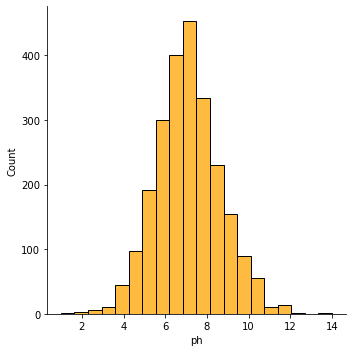

In [89]:
sns.displot(df['ph'],color='orange',bins = 20)

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Potability'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

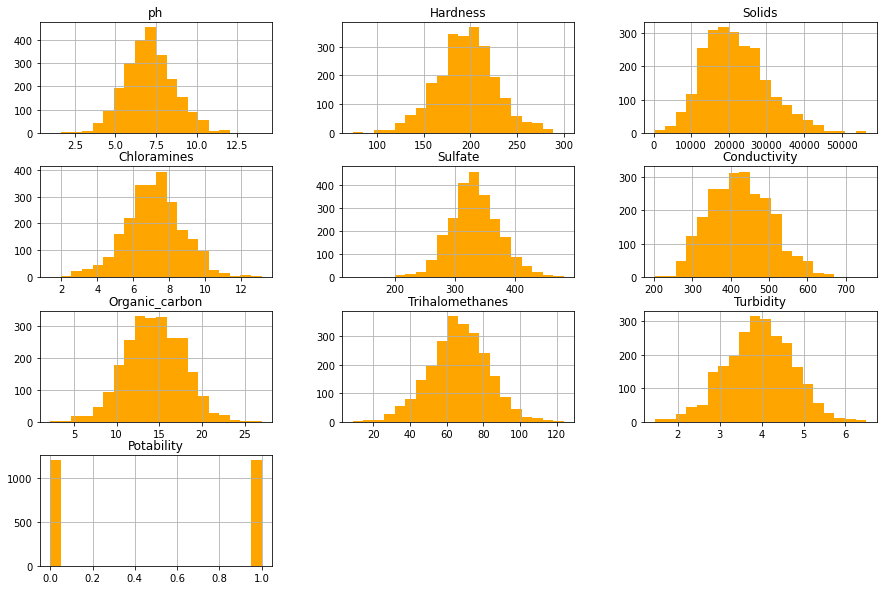

In [54]:
df.hist(figsize=(15,10),color='orange',bins=20)

<AxesSubplot:>

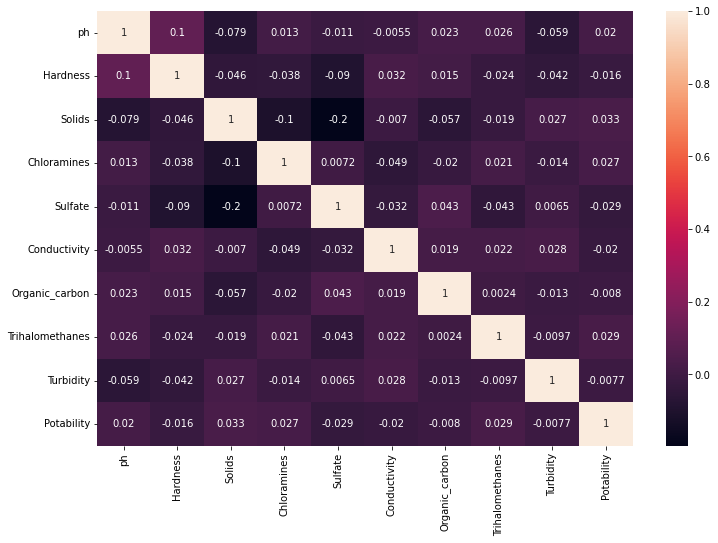

In [55]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [56]:
df_corr = df.corr()
df_corr['Potability'].sort_values(ascending = False)

Potability         1.000000
Solids             0.033281
Trihalomethanes    0.029260
Chloramines        0.027323
ph                 0.019509
Turbidity         -0.007687
Organic_carbon    -0.007996
Hardness          -0.016310
Conductivity      -0.019942
Sulfate           -0.029005
Name: Potability, dtype: float64

In [57]:
X = df.drop('Potability',axis=1)
y = df['Potability']

In [59]:
st = StandardScaler()

In [61]:
x_columns = X.columns
X[x_columns] = st.fit_transform(X[x_columns])

In [62]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3225,0.886836,-1.959760,-0.101990,0.520706,0.298084,-0.811575,-1.094072,-0.140666,-1.367187
561,-0.305747,-0.728478,-0.819385,-0.044076,0.141303,-0.249905,0.386441,-0.515110,0.490391
2322,1.334503,1.427180,0.728499,-0.203641,-1.672090,1.768747,-1.884166,-1.163543,-0.518518
1977,0.050960,0.336155,0.451849,0.394043,-0.268781,0.736269,0.361951,-1.107368,1.012251
973,-1.715971,1.389395,0.251030,1.603773,0.132009,1.341039,-0.752171,0.144341,1.388621


In [63]:
X.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03
mean,4.899784e-16,2.782641e-16,8.696747e-17,-5.040557e-16,-1.089823e-15,-2.965221e-16,-5.731873e-16,-1.938651e-16,5.182891e-16
std,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00
min,-3.949555e+00,-3.793180e+00,-2.514301e+00,-3.531082e+00,-4.864670e+00,-2.784957e+00,-3.668361e+00,-3.661512e+00,-3.186855e+00
25%,-6.437116e-01,-5.884188e-01,-7.393425e-01,-6.051879e-01,-6.284983e-01,-7.554791e-01,-6.897268e-01,-6.315345e-01,-6.687663e-01
50%,-4.653725e-02,3.572745e-02,-1.225582e-01,2.938824e-03,-3.776914e-02,-4.298161e-02,-1.222659e-02,-1.652648e-04,2.578213e-03
75%,6.170089e-01,6.206727e-01,6.173876e-01,6.191037e-01,6.072930e-01,6.963691e-01,7.355617e-01,6.685573e-01,6.907318e-01
max,4.463777e+00,3.258894e+00,4.025774e+00,3.662361e+00,3.549411e+00,4.064490e+00,3.806757e+00,3.604225e+00,3.246077e+00


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [74]:
hgbc = HistGradientBoostingClassifier(random_state=0, max_leaf_nodes=None, min_samples_leaf=2, max_iter=1000)
rf = RandomForestClassifier(min_samples_leaf = 2, n_estimators = 1000, random_state = 0)

In [143]:
hgbc.fit(X_train, y_train)
model = rf.fit(X_train, y_train)

In [76]:
hgbc_pred = hgbc.predict(X_test)
rf_pred = rf.predict(X_test)

In [82]:
print(classification_report(hgbc_pred,y_test))
print(confusion_matrix(hgbc_pred,y_test))
print('GradientBoosting : ',(accuracy_score(hgbc_pred, y_test)))


              precision    recall  f1-score   support

           0       0.86      0.81      0.83       125
           1       0.80      0.86      0.83       115

    accuracy                           0.83       240
   macro avg       0.83      0.83      0.83       240
weighted avg       0.84      0.83      0.83       240

[[101  24]
 [ 16  99]]
GradientBoosting :  0.8333333333333334


In [83]:
print(classification_report(rf_pred,y_test))
print(confusion_matrix(rf_pred,y_test))
print('RandomForest : ',(accuracy_score(rf_pred, y_test)))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       129
           1       0.80      0.89      0.85       111

    accuracy                           0.85       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240

[[105  24]
 [ 12  99]]
RandomForest :  0.85


In [78]:
label = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

In [79]:
feature = rf.feature_importances_   

print('Feature Importances:')
for i, feat in enumerate(label):
    print('\t{0:20s} : {1:>.6f}'.format(feat, feature[i]))

Feature Importances:
	ph                   : 0.142044
	Hardness             : 0.110701
	Solids               : 0.114910
	Chloramines          : 0.122815
	Sulfate              : 0.141284
	Conductivity         : 0.096039
	Organic_carbon       : 0.090089
	Trihalomethanes      : 0.094241
	Turbidity            : 0.087877


Text(0.5, 1.0, 'feature importances')

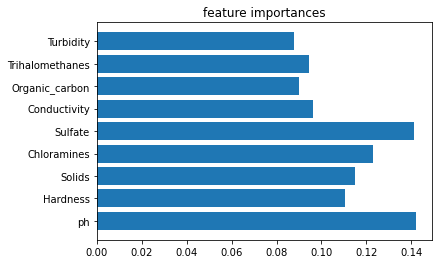

In [80]:
plt.barh(label, feature)
plt.title('feature importances')

In [94]:
df_potability.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
255,7.657991,236.960889,14245.789121,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,1


In [116]:
rf_pred = rf.predict([[5.735724, 158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954]])

In [117]:
rf_pred

array([0], dtype=int64)

In [133]:
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on test set: 0.850


In [129]:
print("Accuracy on test set: {:.3f}".format(hgbc.score(X_test, y_test)))

Accuracy on test set: 0.833


In [134]:
import joblib

In [144]:
joblib.dump(model,r'I:\Deep Learning data\water_potability/models/water_quality_prediction.save')

['I:\\Deep Learning data\\water_potability/models/water_quality_prediction.save']

In [145]:
model = joblib.load(r'I:\Deep Learning data\water_potability/models/water_quality_prediction.save')

In [153]:
rf_pred = model.predict([[5.735724, 158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954]])

In [154]:
rf_pred

array([0], dtype=int64)